In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum()
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

In [4]:
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [6]:
# Ensure relevant columns exist: 'Order ID', 'Amount', 'B2B'
relevant_columns = ['Order ID', 'Amount', 'B2B', 'ship-country']
df = df.dropna(subset=relevant_columns)
print(f"Dataset after cleaning: {df.shape[0]} rows") 
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

Dataset after cleaning: 121143 rows


In [14]:
# Segment Customers by Order Frequency and Value
customer_orders = df.groupby('Order ID').agg(
    Total_Sales=('Amount', 'sum'),
    Order_Count=('Amount', 'count'),
    Average_Order_Value=('Amount', 'mean')
).reset_index()

print("\nCustomer Segmentation Summary:")
print(customer_orders.describe())


Customer Segmentation Summary:
         Total_Sales    Order_Count  Average_Order_Value
count  112861.000000  112861.000000        112861.000000
mean      696.170938       1.073382           649.816986
std       369.360358       0.338454           279.887779
min         0.000000       1.000000             0.000000
25%       459.000000       1.000000           452.000000
50%       635.000000       1.000000           612.000000
75%       824.000000       1.000000           788.000000
max      8636.000000      12.000000          5495.000000


In [15]:
#  B2B vs. B2C Segmentation
b2b_b2c_summary = df.groupby('B2B')['Amount'].agg(['sum', 'mean', 'count'])
b2b_b2c_summary.columns = ['Total Sales', 'Average Sales', 'Order Count']
print("\nB2B vs. B2C Summary:")
print(b2b_b2c_summary)


B2B vs. B2C Summary:
       Total Sales  Average Sales  Order Count
B2B                                           
False  77979068.46     648.210446       120299
True     591479.79     700.805438          844


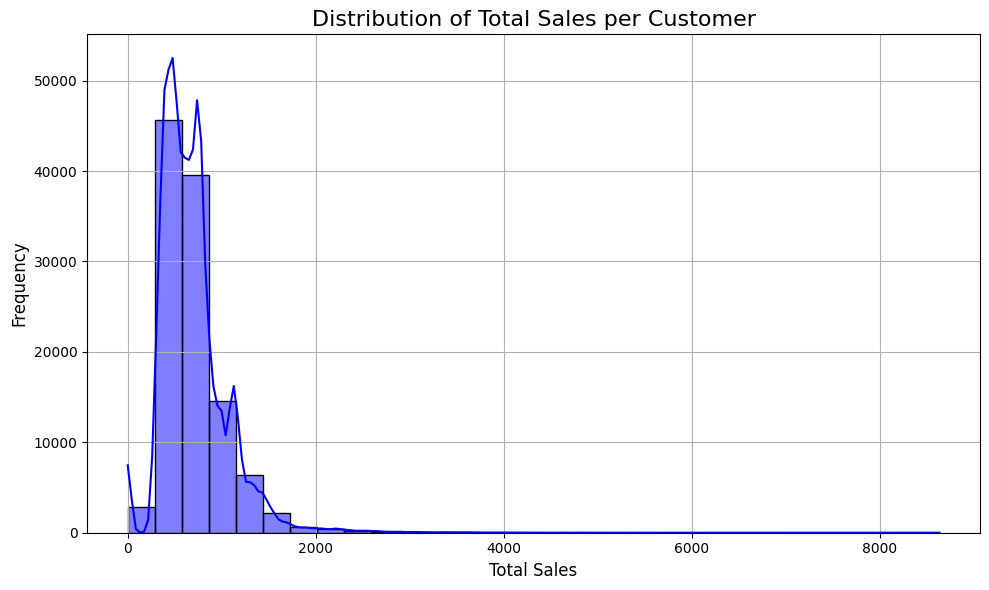

In [16]:
# Distribution of Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(customer_orders['Total_Sales'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Sales per Customer", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_26432\1036446067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=b2b_b2c_summary.index, y=b2b_b2c_summary['Average Sales'], palette='viridis')


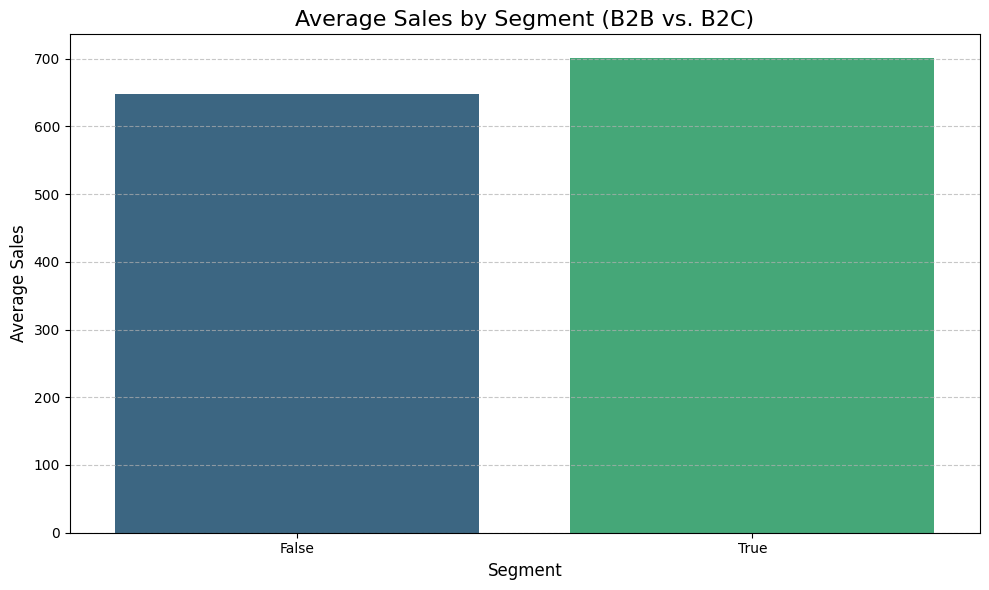

In [17]:
# Average Order Value by Segment (B2B vs. B2C)
plt.figure(figsize=(10, 6))
sns.barplot(x=b2b_b2c_summary.index, y=b2b_b2c_summary['Average Sales'], palette='viridis')
plt.title("Average Sales by Segment (B2B vs. B2C)", fontsize=16)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

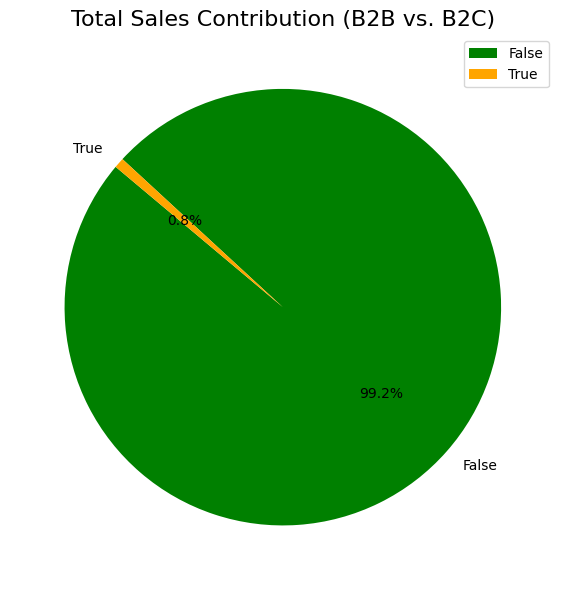

In [19]:
#Total Sales Contribution (B2B vs. B2C)
plt.figure(figsize=(8, 6))
b2b_b2c_summary['Total Sales'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.title("Total Sales Contribution (B2B vs. B2C)", fontsize=16)
plt.ylabel("")  # Hide y-label for clarity
plt.tight_layout()
plt.legend()
plt.show()

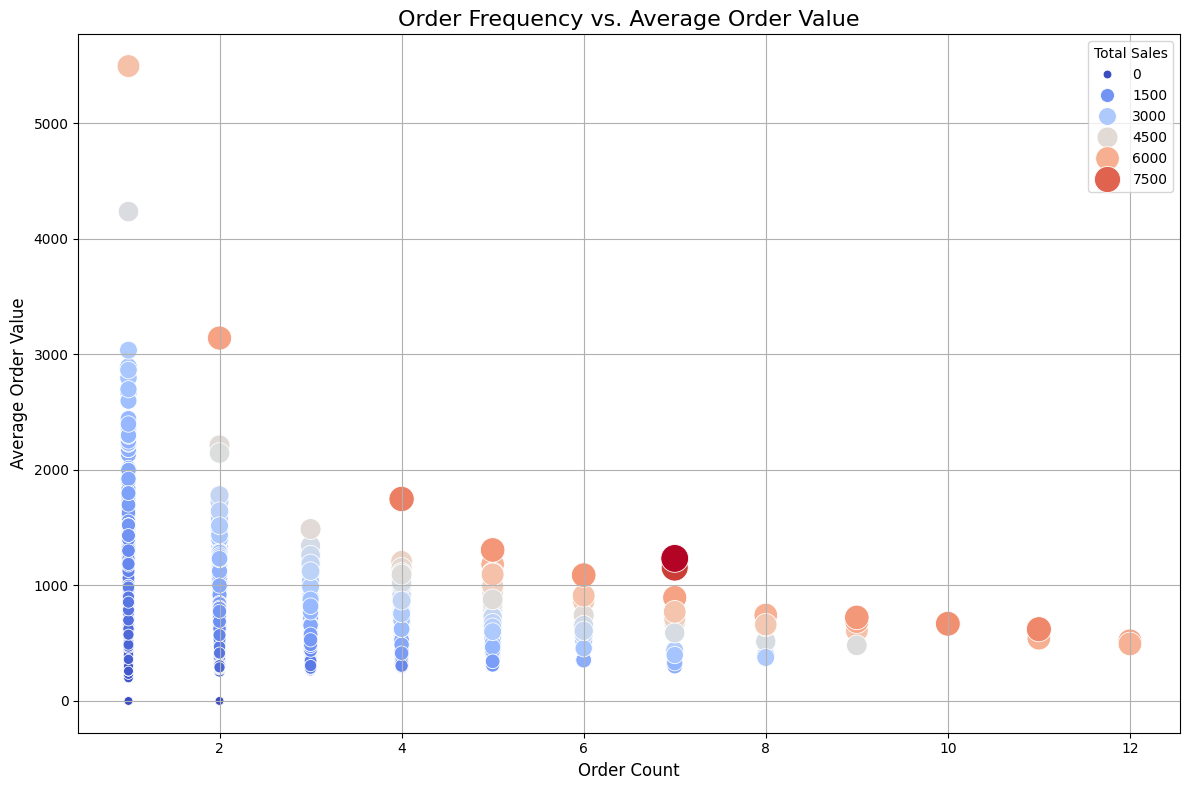

In [20]:
# Heatmap of Order Frequency vs. Average Order Value
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=customer_orders,
    x='Order_Count',
    y='Average_Order_Value',
    hue='Total_Sales',
    palette='coolwarm',
    size='Total_Sales',
    sizes=(40, 400),
    legend='brief'
)
plt.title("Order Frequency vs. Average Order Value", fontsize=16)
plt.xlabel("Order Count", fontsize=12)
plt.ylabel("Average Order Value", fontsize=12)
plt.grid(True)
plt.legend(title="Total Sales", loc='upper right')
plt.tight_layout()
plt.show()

In [13]:
#Key Insights
high_value_customers = customer_orders[customer_orders['Total_Sales'] > customer_orders['Total_Sales'].mean()]
print("\nHigh-Value Customers (Above Average Sales):")
print(high_value_customers)

frequent_customers = customer_orders[customer_orders['Order_Count'] > customer_orders['Order_Count'].mean()]
print("\nFrequent Customers (Above Average Order Count):")
print(frequent_customers)


High-Value Customers (Above Average Sales):
                   Order ID  Total_Sales  Order_Count  Average_Order_Value
7       171-0005999-3189913      1115.00            1              1115.00
10      171-0007212-7125106      1092.00            1              1092.00
18      171-0012485-5716360      1399.00            1              1399.00
19      171-0012628-8493178      1229.00            1              1229.00
20      171-0012693-2893106      1015.24            2               507.62
...                     ...          ...          ...                  ...
112847  408-9992261-0819556       699.00            1               699.00
112848  408-9992707-0064306       984.00            1               984.00
112850  408-9993204-2399565       788.00            1               788.00
112852  408-9994843-8735554       899.00            1               899.00
112853  408-9996597-8580301       855.00            1               855.00

[47428 rows x 4 columns]

Frequent Customers (Above Av